In [1]:
import pandas as pd
import os
from time import time
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline


In [2]:
path_to_data= "/home/ubuntu/udacity/CodeGladiator/invesco/data"

investment_exp_file = "Code-Gladiators-InvestmentExperience.csv"


In [3]:

investment_exp_df = pd.read_csv(os.path.join(path_to_data, investment_exp_file))


In [4]:
df = investment_exp_df


In [10]:
df[df['Month'].str.contains("2015.*")].count()

Unique_Investment_Id                  7104
Morningstar Category                  7104
Month                                 7104
Investment                            7104
Rating                                5511
1 Yr % Rank                           6702
3 Yr % Rank                           5511
5 Yr % Rank                           4778
10 Yr % Rank                          2751
1 Yr Return                           6702
3 Yr Return                           5507
5 Yr Return                           4778
10 Yr Return                          2751
1 Yr Excess Return vs Primary Ix      5862
3 Yr Excess Return vs Primary Ix      4779
5 Yr Excess Return vs Primary Ix      4210
10 Yr Excess Return vs Primary Ix     2739
1 Yr Excess Return vs Category Ix     6702
3 Yr Excess Return vs Category Ix     5507
5 Yr Excess Return vs Category Ix     4778
10 Yr Excess Return vs Category Ix    2751
Net Flows                             7104
dtype: int64

In [11]:
 df[df['Month'].str.contains("2016.*")].apply(lambda x: sum(x.isnull()),axis=0) 

Unique_Investment_Id                     0
Morningstar Category                     0
Month                                    0
Investment                               0
Rating                                1090
1 Yr % Rank                            182
3 Yr % Rank                           1090
5 Yr % Rank                           1941
10 Yr % Rank                          3863
1 Yr Return                            182
3 Yr Return                           1090
5 Yr Return                           1941
10 Yr Return                          3863
1 Yr Excess Return vs Primary Ix      1043
3 Yr Excess Return vs Primary Ix      1864
5 Yr Excess Return vs Primary Ix      2649
10 Yr Excess Return vs Primary Ix     3875
1 Yr Excess Return vs Category Ix      182
3 Yr Excess Return vs Category Ix     1090
5 Yr Excess Return vs Category Ix     1941
10 Yr Excess Return vs Category Ix    3863
Net Flows                                0
dtype: int64

Getting rating of investment in morning star category

In [29]:
temp2 = df.pivot_table(values='Rating',index=['Morningstar Category'],aggfunc=np.median)
print(temp2)

Morningstar Category
US Fund Allocation--30% to 50% Equity    3.0
US Fund Allocation--50% to 70% Equity    3.0
US Fund Allocation--70% to 85% Equity    2.0
US Fund Bank Loan                        3.0
US Fund China Region                     3.0
US Fund Commodities Broad Basket         4.0
US Fund Convertibles                     3.0
US Fund Corporate Bond                   4.0
US Fund Diversified Emerging Mkts        3.0
US Fund Diversified Pacific/Asia         2.0
US Fund Emerging Markets Bond            1.0
US Fund Energy Limited Partnership       NaN
US Fund Equity Energy                    3.0
US Fund Equity Precious Metals           4.0
US Fund Europe Stock                     4.0
US Fund Foreign Large Blend              2.0
US Fund Foreign Large Growth             4.0
US Fund Foreign Small/Mid Blend          2.0
US Fund Global Real Estate               3.0
US Fund Health                           2.0
US Fund High Yield Bond                  3.0
US Fund High Yield Muni           

In [48]:
df.pivot_table(values='Net Flows',index=['Morningstar Category'],aggfunc=np.median)


Morningstar Category
US Fund Allocation--30% to 50% Equity      -8519997
US Fund Allocation--50% to 70% Equity    -107205582
US Fund Allocation--70% to 85% Equity    -424372269
US Fund Bank Loan                        -634308124
US Fund China Region                      -42410199
US Fund Commodities Broad Basket           72327024
US Fund Convertibles                     -189139537
US Fund Corporate Bond                    456417665
US Fund Diversified Emerging Mkts         -66519780
US Fund Diversified Pacific/Asia          -36665078
US Fund Emerging Markets Bond            -302704196
US Fund Energy Limited Partnership        302883896
US Fund Equity Energy                      78016900
US Fund Equity Precious Metals            -21910206
US Fund Europe Stock                      -80966321
US Fund Foreign Large Blend              3395246740
US Fund Foreign Large Growth              511151352
US Fund Foreign Small/Mid Blend            33261856
US Fund Global Real Estate               -1

Finding relation ship between netflows and ratings

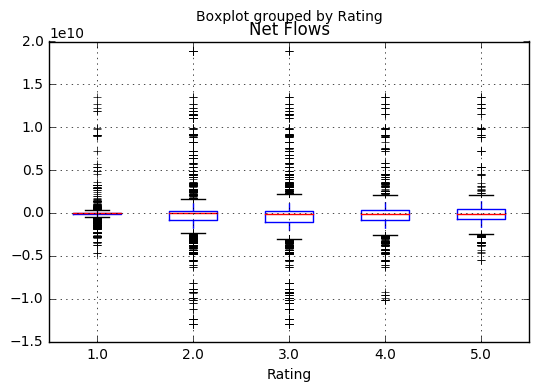

In [24]:
df.boxplot(column='Net Flows', by = 'Rating')

In [25]:
temp2 = df.pivot_table(values='Net Flows',index=['Rating'],aggfunc=np.median)
print(temp2)

Rating
1.0    -14843001
2.0    -36903282
3.0   -137012276
4.0    -94780692
5.0   -115066796
Name: Net Flows, dtype: int64


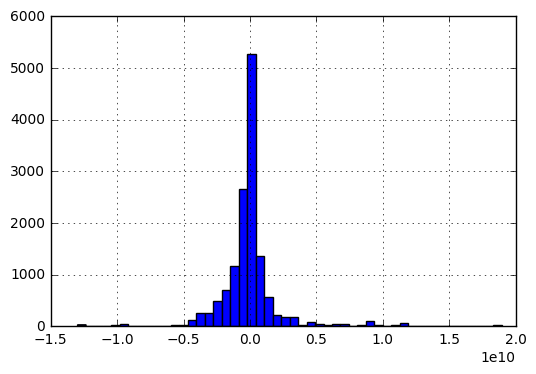

In [26]:
df['Net Flows'].hist(bins = 50)

Checking relationship between the return  and rank columns

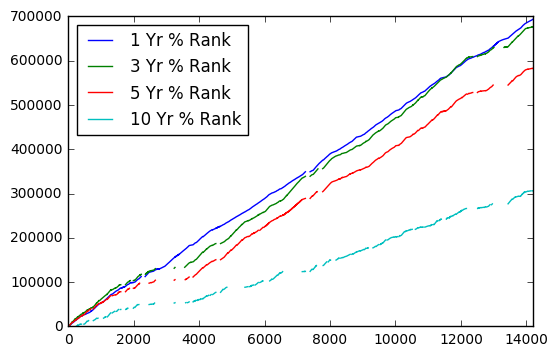

In [30]:
column_list = ['1 Yr % Rank', '3 Yr % Rank','5 Yr % Rank','10 Yr % Rank']
df2=df[column_list].cumsum()

plt.figure(); df2[column_list].plot();

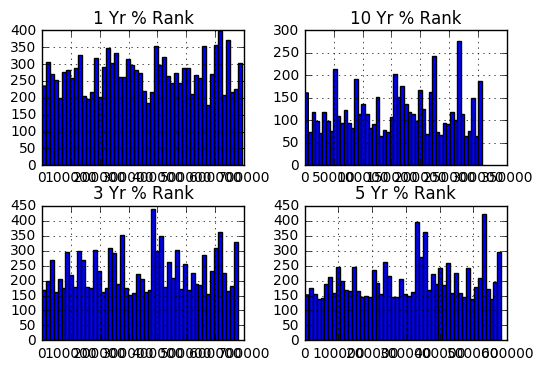

In [37]:
column_list = ['1 Yr % Rank', '3 Yr % Rank','5 Yr % Rank','10 Yr % Rank']
df2=df[column_list].cumsum()

plt.figure(); df2[column_list].hist(bins=50);

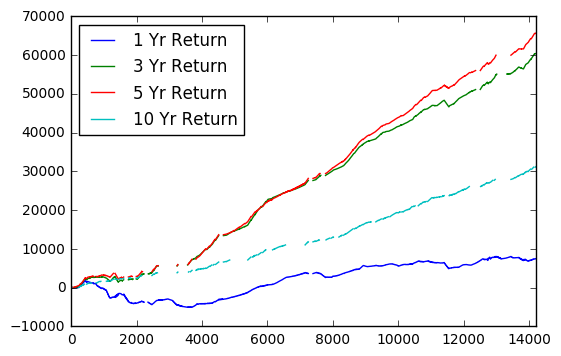

In [31]:
column_list = ['1 Yr Return', '3 Yr Return','5 Yr Return','10 Yr Return']
df2=df[column_list].cumsum()

plt.figure(); df2[column_list].plot();

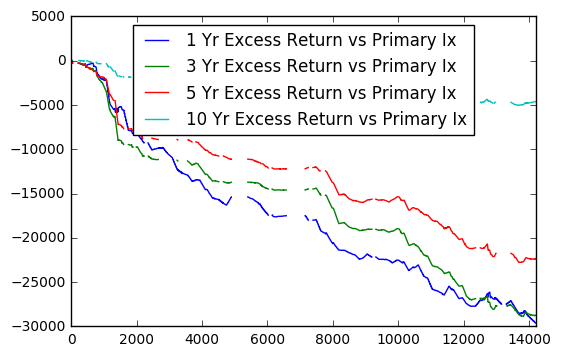

In [34]:
column_list = ['1 Yr Excess Return vs Primary Ix', '3 Yr Excess Return vs Primary Ix','5 Yr Excess Return vs Primary Ix','10 Yr Excess Return vs Primary Ix']
df2=df[column_list].cumsum()

plt.figure(); df2[column_list].plot();

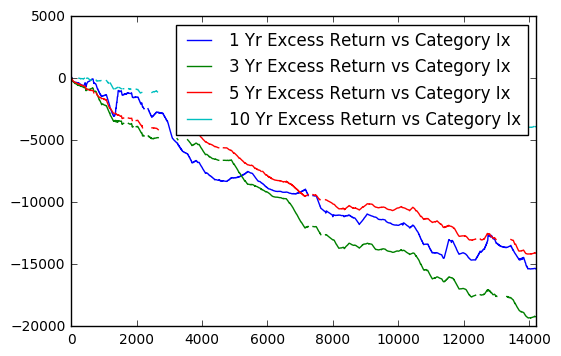

In [35]:
column_list = ['1 Yr Excess Return vs Category Ix', '3 Yr Excess Return vs Category Ix','5 Yr Excess Return vs Category Ix','10 Yr Excess Return vs Category Ix']
df2=df[column_list].cumsum()

plt.figure(); df2[column_list].plot();

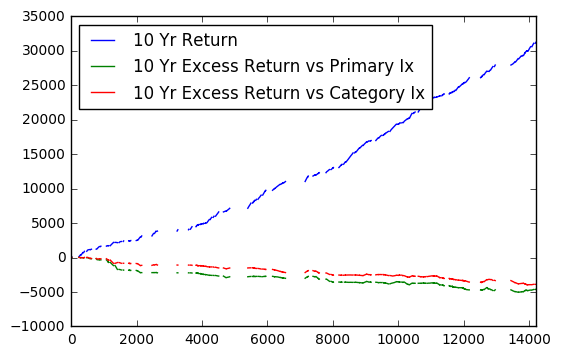

In [45]:
column_list = ['10 Yr Return','10 Yr Excess Return vs Primary Ix','10 Yr Excess Return vs Category Ix']
df2=df[column_list].cumsum()

plt.figure(); df2[column_list].plot();

In [23]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Unique_Investment_Id                     0
Morningstar Category                     0
Month                                    0
Investment                               0
Rating                                2683
1 Yr % Rank                            584
3 Yr % Rank                           2683
5 Yr % Rank                           4267
10 Yr % Rank                          8216
1 Yr Return                            584
3 Yr Return                           2687
5 Yr Return                           4267
10 Yr Return                          8216
1 Yr Excess Return vs Primary Ix      2285
3 Yr Excess Return vs Primary Ix      4189
5 Yr Excess Return vs Primary Ix      5543
10 Yr Excess Return vs Primary Ix     8240
1 Yr Excess Return vs Category Ix      584
3 Yr Excess Return vs Category Ix     2687
5 Yr Excess Return vs Category Ix     4267
10 Yr Excess Return vs Category Ix    8216
Net Flows                                0
dtype: int64

In [5]:
means_ranking_df = df.groupby(['Unique_Investment_Id']).agg({'Rating':'median','1 Yr % Rank': 'median','3 Yr % Rank':'median','5 Yr % Rank':'median','10 Yr % Rank' :'median'  ,
                                                            '1 Yr Return' : 'median', '3 Yr Return' : 'median','5 Yr Return':'median','10 Yr Return':'median',
                                                            '1 Yr Excess Return vs Primary Ix' : 'median', '3 Yr Excess Return vs Primary Ix':'median', '5 Yr Excess Return vs Primary Ix':'median','10 Yr Excess Return vs Primary Ix':'median',
                                                            '1 Yr Excess Return vs Category Ix' : 'median', '3 Yr Excess Return vs Category Ix':'median', '5 Yr Excess Return vs Category Ix':'median','10 Yr Excess Return vs Category Ix':'median'}).reset_index()
means_ranking_df.head()

,Unique_Investment_Id,5 Yr % Rank,3 Yr Excess Return vs Category Ix,10 Yr Excess Return vs Primary Ix,5 Yr Excess Return vs Category Ix,1 Yr Excess Return vs Primary Ix,1 Yr Return,3 Yr % Rank,10 Yr Return,10 Yr % Rank,10 Yr Excess Return vs Category Ix,5 Yr Return,5 Yr Excess Return vs Primary Ix,3 Yr Return,1 Yr Excess Return vs Category Ix,3 Yr Excess Return vs Primary Ix,1 Yr % Rank,Rating
0,3425,70.0,1.452365,2.879065,-0.571456,6.132672,4.313470,40.5,8.439469,3.0,1.478196,1.861909,-1.940589,5.354387,6.271046,0.193646,9.5,2.0
1,3426,83.0,-1.984903,-3.620109,-1.247936,-6.154650,-0.211523,92.0,3.776681,82.5,-2.215109,6.892427,-6.920847,4.640986,-1.822703,-7.953799,73.5,2.0
2,3427,91.5,-2.765217,-4.389632,-2.051878,-6.891441,-0.951020,96.0,3.004650,93.5,-2.986365,6.088274,-7.733077,3.838767,-2.548899,-8.769935,83.5,1.0
3,3428,76.0,-1.614110,-3.273912,-0.880657,-5.780355,0.194600,88.0,4.123375,73.0,-1.875948,7.255940,-6.566543,5.017499,-1.448133,-7.591273,65.5,2.0
4,3429,86.0,-2.239367,-3.870643,-1.503275,-6.394531,-0.407838,93.0,3.525716,87.0,-2.466644,6.621851,-7.191911,4.374213,-2.063470,-8.226222,79.0,2.0


In [6]:
means_ranking_df.describe()

,Unique_Investment_Id,5 Yr % Rank,3 Yr Excess Return vs Category Ix,10 Yr Excess Return vs Primary Ix,5 Yr Excess Return vs Category Ix,1 Yr Excess Return vs Primary Ix,1 Yr Return,3 Yr % Rank,10 Yr Return,10 Yr % Rank,10 Yr Excess Return vs Category Ix,5 Yr Return,5 Yr Excess Return vs Primary Ix,3 Yr Return,1 Yr Excess Return vs Category Ix,3 Yr Excess Return vs Primary Ix,1 Yr % Rank,Rating
count,592.000000,439.000000,544.000000,273.000000,439.000000,506.000000,585.000000,544.000000,274.000000,274.000000,274.000000,439.000000,380.000000,544.000000,585.000000,474.000000,585.000000,544.000000
mean,11322.412162,59.679954,-1.664428,-0.806375,-1.429709,-3.075417,-0.262892,58.482537,5.068417,50.978102,-0.666224,6.374443,-2.566777,4.327183,-1.050289,-2.851883,51.180342,2.806985
std,6196.475312,27.757256,2.910570,2.149950,2.314301,5.995692,5.593723,29.617049,2.206592,28.946671,1.621667,5.078315,4.863322,5.236585,4.000057,5.565653,25.673587,1.058364
min,3425.000000,1.000000,-11.617892,-8.099141,-9.996981,-30.224237,-26.426452,1.000000,-0.756247,1.000000,-5.260296,-13.913009,-28.246444,-18.879540,-15.683261,-36.763759,1.500000,1.000000
25%,4204.500000,36.000000,-3.849866,-1.663161,-2.847508,-5.493297,-1.119588,32.500000,3.662408,28.000000,-1.744964,4.212702,-4.159494,2.336665,-3.062396,-4.975808,31.000000,2.000000
50%,11556.500000,67.000000,-1.344096,-0.531563,-1.486651,-2.287808,0.864787,63.750000,5.176474,52.000000,-0.673381,6.107256,-1.613443,4.425650,-0.788111,-1.488869,53.500000,3.000000
75%,18211.250000,84.500000,0.308904,0.241554,0.017041,0.107858,2.813708,86.500000,6.813631,77.000000,0.302880,10.188558,-0.120969,7.417203,0.754126,0.145965,73.500000,3.500000
max,20064.000000,100.000000,6.686201,4.289891,5.445659,10.096260,10.127425,100.000000,9.450068,98.000000,4.242710,16.890025,7.716149,15.942476,13.232634,8.650818,96.500000,5.000000


In [12]:
columns_list = list(means_ranking_df.columns)
columns_list.remove("Unique_Investment_Id")

In [29]:
new_df =  pd.merge(df, means_ranking_df, on="Unique_Investment_Id", how="left")


In [30]:
new_df.describe()

,Unique_Investment_Id,Rating_x,1 Yr % Rank_x,3 Yr % Rank_x,5 Yr % Rank_x,10 Yr % Rank_x,1 Yr Return_x,3 Yr Return_x,5 Yr Return_x,10 Yr Return_x,...,10 Yr Return_y,10 Yr % Rank_y,10 Yr Excess Return vs Category Ix_y,5 Yr Return_y,5 Yr Excess Return vs Primary Ix_y,3 Yr Return_y,1 Yr Excess Return vs Category Ix_y,3 Yr Excess Return vs Primary Ix_y,1 Yr % Rank_y,Rating_y
count,14208.000000,11525.000000,13624.000000,11525.000000,9941.000000,5992.000000,13624.000000,11521.000000,9941.000000,5992.000000,...,6576.000000,6576.000000,6576.000000,10536.000000,9120.000000,13056.000000,14040.000000,11376.000000,14040.000000,13056.000000
mean,11322.412162,2.805206,50.945831,58.766768,58.687657,51.181575,0.548309,5.248271,6.613163,5.218294,...,5.068417,50.978102,-0.666224,6.374443,-2.566777,4.327183,-1.050289,-2.851883,51.180342,2.806985
std,6191.457480,1.067640,30.122013,29.949056,28.045391,29.044537,9.437454,6.407407,5.364708,2.440597,...,2.202729,28.895998,1.618828,5.072769,4.857185,5.231970,3.996779,5.560023,25.652548,1.057432
min,3425.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-42.193310,-31.087397,-22.446858,-5.599918,...,-0.756247,1.000000,-5.260296,-13.913009,-28.246444,-18.879540,-15.683261,-36.763759,1.500000,1.000000
25%,4204.500000,2.000000,25.000000,33.000000,35.000000,27.000000,-4.360181,2.045619,4.066738,3.594740,...,3.659238,28.000000,-1.745117,4.208962,-4.159494,2.336665,-3.062396,-4.976655,31.000000,2.000000
50%,11556.500000,3.000000,53.000000,65.000000,64.000000,51.000000,1.196329,4.722796,6.287979,5.267620,...,5.176474,52.000000,-0.673381,6.107256,-1.613443,4.425650,-0.788111,-1.488869,53.500000,3.000000
75%,18211.250000,4.000000,78.000000,87.000000,84.000000,79.000000,6.093956,8.797388,10.102464,6.965298,...,6.818935,77.000000,0.319881,10.189172,-0.120969,7.417203,0.754126,0.152587,73.500000,3.500000
max,20064.000000,5.000000,100.000000,100.000000,100.000000,100.000000,92.880240,30.120821,23.354639,12.873699,...,9.450068,98.000000,4.242710,16.890025,7.716149,15.942476,13.232634,8.650818,96.500000,5.000000


In [15]:
new_df.apply(lambda x: sum(x.isnull()),axis=0) 

Unique_Investment_Id                       0
Morningstar Category                       0
Month                                      0
Investment                                 0
Rating_x                                2683
1 Yr % Rank_x                            584
3 Yr % Rank_x                           2683
5 Yr % Rank_x                           4267
10 Yr % Rank_x                          8216
1 Yr Return_x                            584
3 Yr Return_x                           2687
5 Yr Return_x                           4267
10 Yr Return_x                          8216
1 Yr Excess Return vs Primary Ix_x      2285
3 Yr Excess Return vs Primary Ix_x      4189
5 Yr Excess Return vs Primary Ix_x      5543
10 Yr Excess Return vs Primary Ix_x     8240
1 Yr Excess Return vs Category Ix_x      584
3 Yr Excess Return vs Category Ix_x     2687
5 Yr Excess Return vs Category Ix_x     4267
10 Yr Excess Return vs Category Ix_x    8216
Net Flows                                  0
5 Yr % Ran

In [31]:
for column in columns_list:
    #print(df[df[column].isnull()].apply(lambda x: fxy(x['Unique_Investment_Id'],column), axis=1))
    #new_df.loc[new_df[new_df[column+'_x'].isnull()], column+'_x'] = column+'_y'
    new_df[column+'_x'].fillna(new_df[new_df[column+'_x'].isnull()].apply(lambda x: x[column+'_y'], axis=1), inplace=True)
    new_df=new_df.drop(column+'_y', 1)
    new_df = new_df.rename(columns={column+'_x': column})
                                                                               

In [17]:
new_df.describe()

,Unique_Investment_Id,Rating,1 Yr % Rank,3 Yr % Rank,5 Yr % Rank,10 Yr % Rank,1 Yr Return,3 Yr Return,5 Yr Return,10 Yr Return,1 Yr Excess Return vs Primary Ix,3 Yr Excess Return vs Primary Ix,5 Yr Excess Return vs Primary Ix,10 Yr Excess Return vs Primary Ix,1 Yr Excess Return vs Category Ix,3 Yr Excess Return vs Category Ix,5 Yr Excess Return vs Category Ix,10 Yr Excess Return vs Category Ix,Net Flows
count,14208.000000,13056.000000,14040.000000,13056.000000,10536.000000,6576.000000,14040.000000,13056.000000,10536.000000,6576.000000,12144.000000,11376.000000,9120.000000,6552.000000,14040.000000,13056.000000,10536.000000,6576.000000,1.420800e+04
mean,11322.412162,2.847733,50.525499,57.439645,58.646545,50.889751,0.497345,4.874007,6.405786,5.191705,-2.580219,-2.680860,-2.530369,-0.768582,-1.096477,-1.640372,-1.400162,-0.644472,-6.377975e+07
std,6191.457480,1.092409,30.278047,30.307673,28.434264,29.217967,9.443320,6.296108,5.466794,2.425723,7.969030,5.455405,4.981718,2.188444,5.608935,3.225098,2.458602,1.660483,2.481486e+09
min,3425.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-42.193310,-31.087397,-22.446858,-5.599918,-53.109905,-45.179073,-35.878603,-12.082922,-25.578430,-14.144617,-11.795999,-5.766622,-1.297583e+10
25%,4204.500000,2.000000,24.000000,31.000000,34.000000,27.000000,-4.432025,1.793209,3.997806,3.593821,-5.837109,-4.729172,-4.228593,-1.721914,-3.318991,-3.333485,-2.873482,-1.698557,-7.153228e+08
50%,11556.500000,3.000000,52.000000,63.000000,65.000000,51.000000,1.208245,4.433606,6.127918,5.205071,-1.669334,-1.552324,-1.569317,-0.600988,-0.892722,-1.325126,-1.263603,-0.696837,-4.787134e+07
75%,18211.250000,4.000000,78.000000,85.000000,85.000000,78.000000,6.025580,8.046936,9.932795,6.973949,0.976329,0.373071,0.097700,0.333349,1.079328,0.290941,0.093700,0.316600,3.027055e+08
max,20064.000000,5.000000,100.000000,100.000000,100.000000,100.000000,92.880240,30.120821,23.354639,12.873699,87.266266,15.049113,11.611675,5.294308,81.410878,13.316988,7.225122,5.224587,1.894229e+10


In [32]:
new_df.apply(lambda x: sum(x.isnull()),axis=0) 

Unique_Investment_Id                     0
Morningstar Category                     0
Month                                    0
Investment                               0
Rating                                1152
1 Yr % Rank                            168
3 Yr % Rank                           1152
5 Yr % Rank                           3672
10 Yr % Rank                          7632
1 Yr Return                            168
3 Yr Return                           1152
5 Yr Return                           3672
10 Yr Return                          7632
1 Yr Excess Return vs Primary Ix      2064
3 Yr Excess Return vs Primary Ix      2832
5 Yr Excess Return vs Primary Ix      5088
10 Yr Excess Return vs Primary Ix     7656
1 Yr Excess Return vs Category Ix      168
3 Yr Excess Return vs Category Ix     1152
5 Yr Excess Return vs Category Ix     3672
10 Yr Excess Return vs Category Ix    7632
Net Flows                                0
dtype: int64

In [33]:
#for column in columns_list:
#    new_df[column] = new_df[column].astype(float)

    
new_df= new_df.fillna(new_df.median())



In [34]:
new_df.apply(lambda x: sum(x.isnull()),axis=0) 

Unique_Investment_Id                  0
Morningstar Category                  0
Month                                 0
Investment                            0
Rating                                0
1 Yr % Rank                           0
3 Yr % Rank                           0
5 Yr % Rank                           0
10 Yr % Rank                          0
1 Yr Return                           0
3 Yr Return                           0
5 Yr Return                           0
10 Yr Return                          0
1 Yr Excess Return vs Primary Ix      0
3 Yr Excess Return vs Primary Ix      0
5 Yr Excess Return vs Primary Ix      0
10 Yr Excess Return vs Primary Ix     0
1 Yr Excess Return vs Category Ix     0
3 Yr Excess Return vs Category Ix     0
5 Yr Excess Return vs Category Ix     0
10 Yr Excess Return vs Category Ix    0
Net Flows                             0
dtype: int64

In [35]:

table = new_df.pivot_table(values='Rating',index=['Morningstar Category'],aggfunc=np.median)

print(table)

Morningstar Category
US Fund Allocation--30% to 50% Equity    3.0
US Fund Allocation--50% to 70% Equity    3.0
US Fund Allocation--70% to 85% Equity    2.0
US Fund Bank Loan                        3.0
US Fund China Region                     3.0
US Fund Commodities Broad Basket         4.0
US Fund Convertibles                     3.0
US Fund Corporate Bond                   4.0
US Fund Diversified Emerging Mkts        2.0
US Fund Diversified Pacific/Asia         2.0
US Fund Emerging Markets Bond            1.0
US Fund Energy Limited Partnership       3.0
US Fund Equity Energy                    3.0
US Fund Equity Precious Metals           4.0
US Fund Europe Stock                     4.0
US Fund Foreign Large Blend              2.0
US Fund Foreign Large Growth             4.0
US Fund Foreign Small/Mid Blend          2.0
US Fund Global Real Estate               3.0
US Fund Health                           2.0
US Fund High Yield Bond                  3.0
US Fund High Yield Muni           

In [38]:
def fage(x):
 return table.loc[x['Morningstar Category']]

In [39]:

new_df['Morningstar_Category_Rating'] = new_df.apply(fage, axis=1)

In [43]:

new_df[['Morningstar Category','Morningstar_Category_Rating']].head()

,Morningstar Category,Morningstar_Category_Rating
0,US Fund China Region,3.0
1,US Fund China Region,3.0
2,US Fund China Region,3.0
3,US Fund China Region,3.0
4,US Fund China Region,3.0


In [44]:
new_df.to_csv('../data/imputed_investment_exp.csv',index=False)

In [53]:
def fxy(x, column):
    print("values recieved : "+str(x) +" "+column)
    df2= means_ranking_df.loc[means_ranking_df['Unique_Investment_Id'] == x,column].reset_index()
    return df2.get_value(df.index[0],column)
    

In [63]:
type(fxy(3427,'Unique_Investment_Id'))

values recieved : 3427 Unique_Investment_Id


numpy.int64